<img src = '../../sb_tight.png'>
<h1 align = 'center'> Capstone Project 2: Pump It Up </h1>

---

### Notebook 2: EDA (Exploratory Data Analysis)
**Author:<br>
Tashi T. Gurung**<br>
**hseb.tashi@gmail.com**

### About the project:
The **objective** of this project is to **predict the failure of water points** spread accross Tanzania before they occur.

50% of Tanzania's population do not have access to safe water. Among other sources, Tanzanians depend on water points mostly pumps (~60K) spread across Tanzania. Compared to other infrastructure projects, water point projects consist of a huge number of inspection points that are geographically spread out. Gathering data on the condition of these pumps has been a challenge. From working with local agencies, to implementing mobile based crowd sourcing projects, none have produced satisfactory results.

The lack of quality data creates a number of problem for a stakeholder like the Tanzanian Government, specifically the Ministry of Water. Consequences include not only higher maintainence costs, but also all the problems and nuanced issues faced by communities when their access to water is compromised or threatened.

While better data collection infrastructure should be built overtime, this project (with its model(s), various analysis, and insights) will be key for efficient resource allocation to maximize the number of people and communities with access to water.
In the long run, it will assist stake holders in and project planning, and even local, regional and national level policy formation. 

### About the notebook:
We imported the dataset produced by the '1.Data Wrangling.ipynb' notebook.\
We will perform EDA to better understand the data.\
To look at the relationship between variables.\
We will also take a closer look at missing values including spotting patterns.

---

<a id = 'toc'> <h2> Table of Contents </h2> </a>
<ol>
    <li><a href = '#feature 1'> subvillage </a></li>
    <li><a href = '#feature 2'> installer </a></li>
    <li><a href = '#feature 3'> scheme name </a></li>
    <li><a href = '#feature 4'> funder </a></li>
    <li><a href = '#feature 5'> ward </a></li>
</ol>

# Import libraries and datasets

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/interim/df.csv')

---

Some categorical variables have datatype int.\
Let us convert them to their correct datatype i.e. string

In [3]:
# convert datatype of cols from int to str
cols = ['id','region_code','district_code',]
for col in cols:
    df[col] = df[col].astype('str')

---

Look at the counts of each data type

In [4]:
df.dtypes.value_counts()

object     33
float64     3
int64       3
dtype: int64

Now we have 32 categorical variables excluding target variable, but only<br>
6 numeric variables<br>
Hence, let us start our EDA with categorical variables

---

<h1> EDA: Categorical Variables </h1>

Primary Resource Consulted for this portion of EDA:\
Medium/Analytics Vidhya\
https://medium.com/analytics-vidhya/tutorial-exploratory-data-analysis-eda-with-categorical-variables-6a569a3aea55

In [5]:
# filter for only categorical features
df_cat = df.select_dtypes(include=object)

# CONCAT 
# -> first row, and 
# -> nunique() of each column

df_cat = pd.concat([df_cat.iloc[0].T,df_cat.nunique(), df_cat.isna().sum()/len(df_cat)], 
          axis = 1, 
          keys = ['e.g. row1','nunique()', 'missing_value %'])
df_cat

,e.g. row1,nunique(),missing_value %
id,69572,59400,0.000000
date_recorded,2011-03-14,356,0.000000
funder,Roman,1897,0.061195
installer,Roman,2145,0.061532
wpt_name,none,37400,0.000000
basin,Lake Nyasa,9,0.000000
subvillage,Mnyusi B,19287,0.006246
region,Iringa,21,0.000000
region_code,11,27,0.000000
district_code,5,20,0.000000


---

For EDA's that follow, let us temporarity convert the target_variable to a numeric datatype with 2 classes instead of 3

In [6]:
df['target_var'] = df['target_var'].map({'functional':1,
                                         'non functional':0,
                                         'functional needs repair':0})

---

In [7]:
def feature_vs_target_series(feature_name):
    return df.groupby(feature_name)['target_var'].mean().std()

List of Categorical Features

In [8]:
columns = df_cat.index
columns = columns.drop(['id',
                        'date_recorded',
                        'recorded_by', # only 1 category i.e.GeoData Consultants Ltd
                        'wpt_name', 
                        'target_var'])

standard deviation of the mean within each category of the different features

In [9]:
std_series = pd.Series(dtype = 'float')
for column in columns:
    std_series[column]=feature_vs_target_series(column)

nunique() for each feature

In [10]:
nunique_series = pd.Series(dtype = 'float')
for index in std_series.sort_values(ascending = False).index:
    nunique_series[index]= df[index].nunique()

Combine the above two series

In [11]:
f_df = pd.concat([std_series, nunique_series], axis = 1)
f_df.columns = ['std()', 'nunique()']
f_df.sort_values(by = 'std()', ascending = False)

,std(),nunique()
subvillage,0.436019,19287
installer,0.428051,2145
scheme_name,0.417182,2696
funder,0.416414,1897
ward,0.268878,2092
quantity,0.257967,5
waterpoint_type_group,0.251232,6
waterpoint_type,0.247132,7
quality_group,0.193018,6
region_code,0.192321,27


---

In [12]:
def feature_vs_target_barchart(feature_name):
    s = round(df.groupby(feature_name)['target_var'].mean().sort_values(),2)
    s['Overall'] = df['target_var'].mean()
    
    fig, ax = plt.subplots(figsize = (10,8))

    _ = sns.barplot(x = s.index, y = s.values,
                    ax = ax)

    sns.despine()
    for bar in _.patches:
        _.annotate(f'{(int(bar.get_height()*100))}%',    # annotation text
                       (bar.get_x() + bar.get_width() / 2,  # X co-ordinate
                        bar.get_height()),              # Y co-ordinate
                       ha='center', va='center',            # text alignment 
                       size=10,            # text font
                       xytext=(0, 10),                       
                       textcoords='offset points')

    plt.ylabel('Likelihood of being Functional')
    plt.xlabel(feature_name)
    plt.title(f'{feature_name.title()} vs Target Variable')

    plt.xticks(rotation = 90)
    ;
    return (s)

---

<a id = 'feature 1'> 1. Feature: **subvillage** vs **target variable**</a>

We will skip subvillage for now, because it has high cardinality

<a href = '#toc'> Back to Table of Contents </a>

---

<a id = 'feature 2'> 2. Feature: **installer** vs **target variable**</a>

In [13]:
df['installer'].value_counts()/len(df)

DWE             0.292963
Government      0.030724
RWE             0.020303
Commu           0.017845
DANIDA          0.017677
                  ...   
ECO LODGE       0.000017
Village Govt    0.000017
VILLAGE         0.000017
CDT             0.000017
Mzungu          0.000017
Name: installer, Length: 2145, dtype: float64

DWE is the largest installer by volume (i.e. ~29%), followed by Government with only ~3% of the pumps installed.

**Question**:<br>
Are pumps installed by the largest installer, DWE more or less likely to be functional vs other installers?

In [14]:
df['installer_bool'] = np.where(df['installer'] == 'DWE', 'DWE', 'Non-DWE')

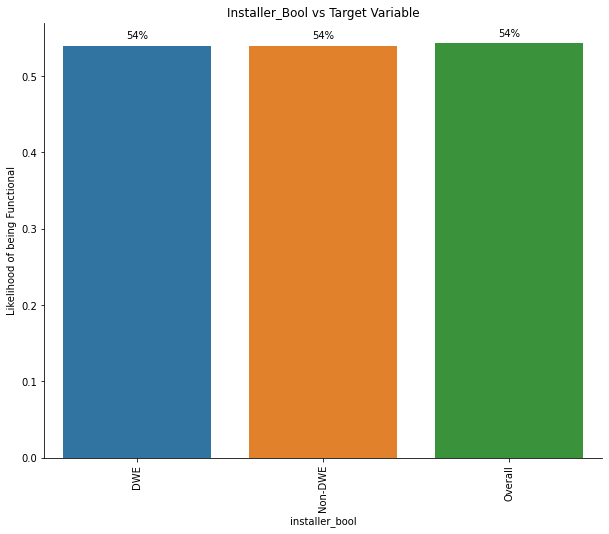

In [15]:
s = feature_vs_target_barchart('installer_bool')

In [16]:
s['DWE']/s['Non-DWE']

1.0

**Comments:** <br>
Whether water pumps are installed by DWE or Non-DWE has no significant correlation with it's status

<a href = '#toc'> Back to Table of Contents </a>

---

<a id = 'feature 3'> 3. Feature: **scheme_name** vs **target variable**</a>

In [17]:
(df['scheme_name'].value_counts()/len(df)).head(10)*100

K                              1.148148
None                           1.084175
Borehole                       0.919192
Chalinze wate                  0.681818
M                              0.673401
DANIDA                         0.638047
Government                     0.538721
Ngana water supplied scheme    0.454545
wanging'ombe water supply s    0.439394
wanging'ombe supply scheme     0.393939
Name: scheme_name, dtype: float64

Cannot think of any way to reduce the cardinality of this feature variable

<a href = '#toc'> Back to Table of Contents </a>

---

<a id = 'feature 4'> 4. Feature: **funder** vs **target variable**</a>

In [18]:
df['funder'].value_counts()/len(df)

Government Of Tanzania    0.152929
Danida                    0.052424
Hesawa                    0.037071
Rwssp                     0.023131
World Bank                0.022710
                            ...   
Mbozi Hospital            0.000017
Mzee Shindika             0.000017
Paulo Sange               0.000017
Bkhws                     0.000017
Manyota Primary School    0.000017
Name: funder, Length: 1897, dtype: float64

**Question**: <br>
Are pumps funded by the government more or less likely to be functional?

Let us create a new feature called 'funder_bool' where if funder  is 'Government of Tanzania' or 'Ministry of Water', value = 'govt', else 'non-govt'

In [19]:
df['funder_bool'] = np.where(df['funder'].isin(['Government Of Tanzania','Ministry Of Water']), 'govt', 'non-govt')

**Visualization**

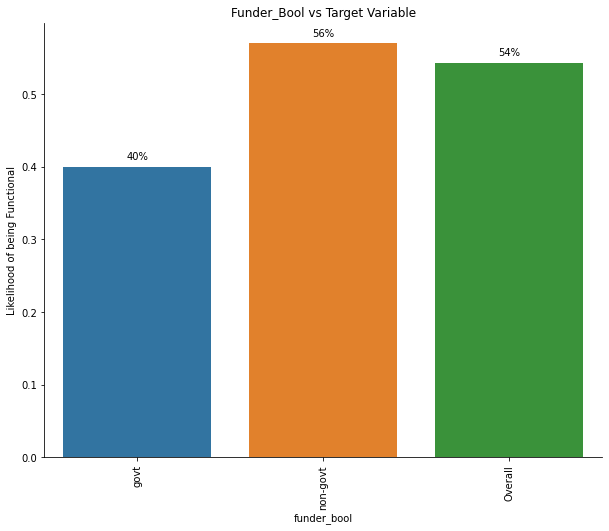

In [20]:
s = feature_vs_target_barchart('funder_bool')

In [21]:
round(57.01/40.44,2)

1.41

In [22]:
round(s['non-govt']/s['govt'],2)

1.42

**Comments**:<br>
Water pumps funded by the non-governmental organizations are ~41% more likely to be functional vs those funded by the government

<a href = '#toc'> Back to Table of Contents </a>

---

<a id = 'feature 5'> 5. Feature: **ward** vs **target variable**</a>

In [23]:
df['ward'].value_counts()

Igosi          307
Imalinyi       252
Siha Kati      232
Mdandu         231
Nduruma        217
              ... 
Kirongo          1
Uchindile        1
Matarawe         1
Machinjioni      1
Mitole           1
Name: ward, Length: 2092, dtype: int64

Cannot think of any way to reduce the cardinality of this feature variable

<a href = '#toc'> Back to Table of Contents </a>

---

Low Cadinality Features

In [24]:
lcf = nunique_series[5:]
lcf

quantity                   5
waterpoint_type_group      6
waterpoint_type            7
quality_group              6
region_code               27
scheme_management         12
district_code             20
extraction_type           18
water_quality              8
lga                      125
extraction_type_class      7
management                12
extraction_type_group     13
source                    10
payment                    7
payment_type               7
region                    21
basin                      9
public_meeting             2
management_group           5
source_type                7
permit                     2
source_class               3
dtype: int64

In [25]:
columns = lcf.index.to_list()
columns.remove('lga') # because of relatively higher cardinality i.e. 125 vs 2nd highest at 27

<ipython-input-12-f44c214fb178>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (10,8))


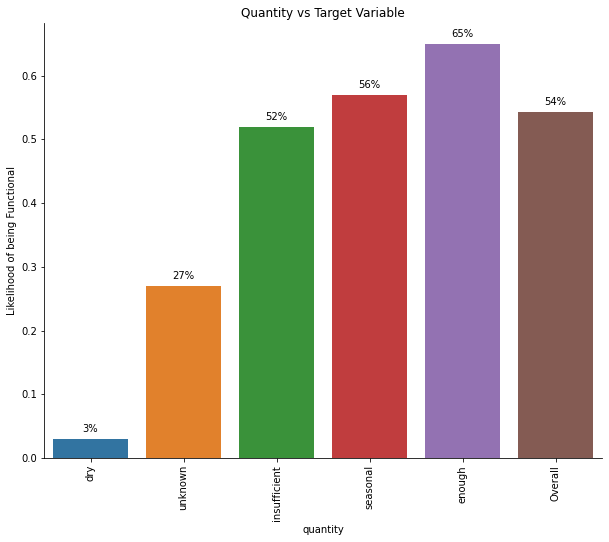

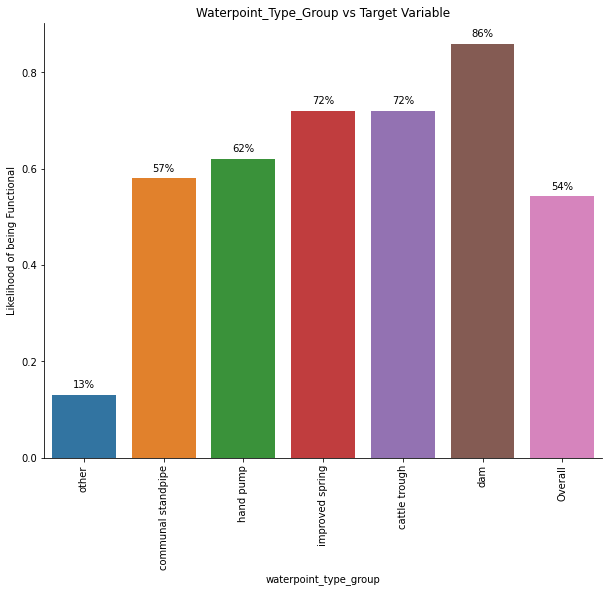

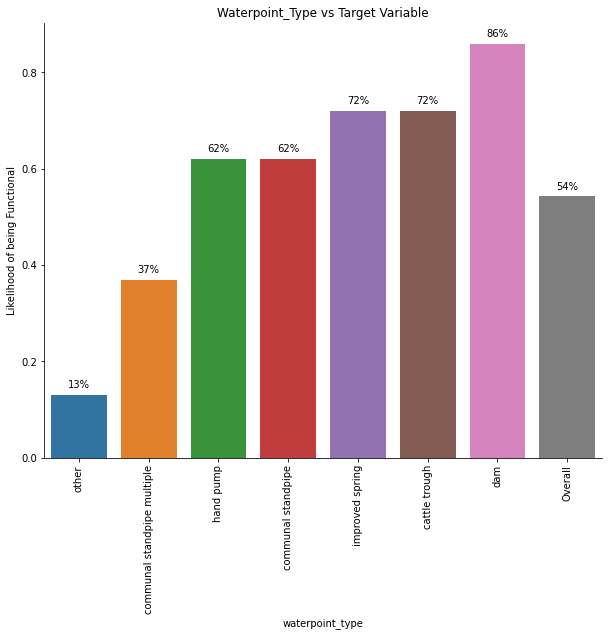

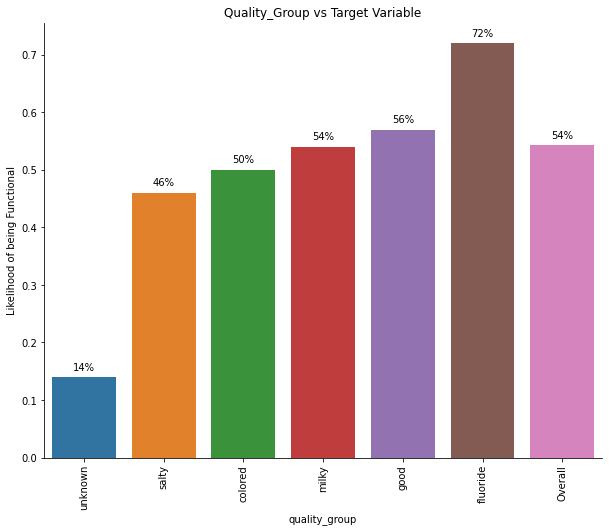

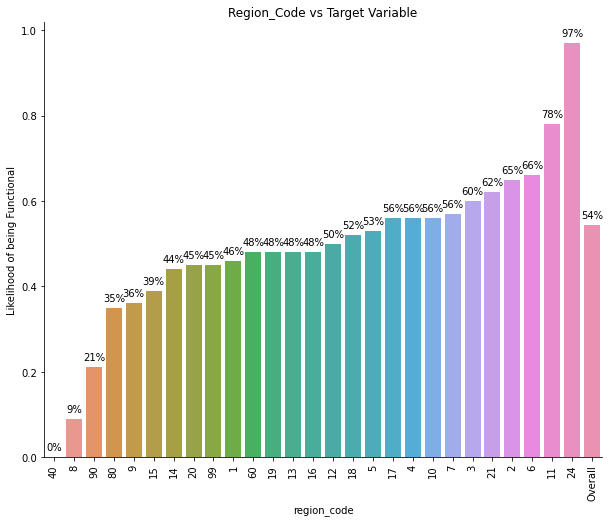

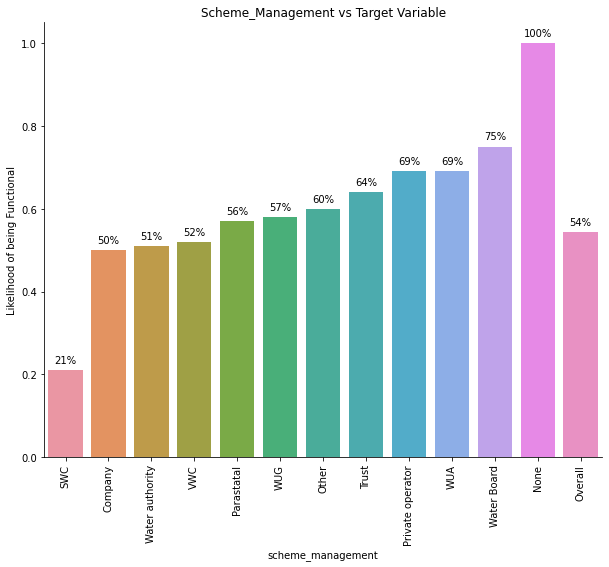

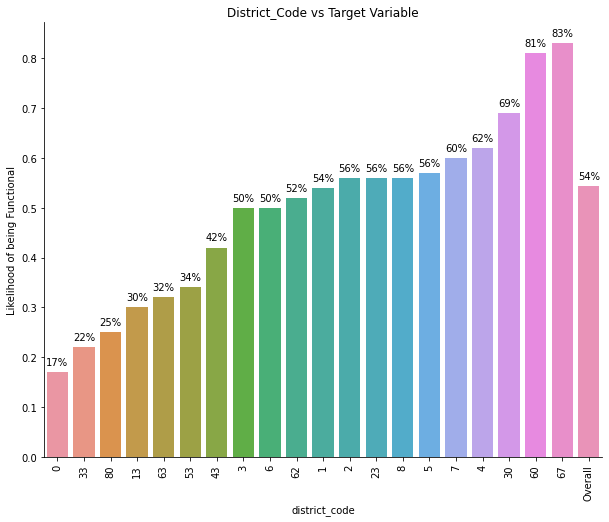

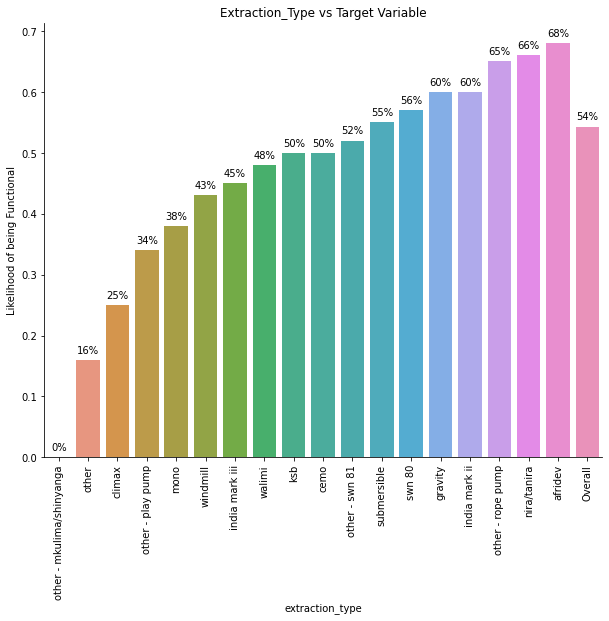

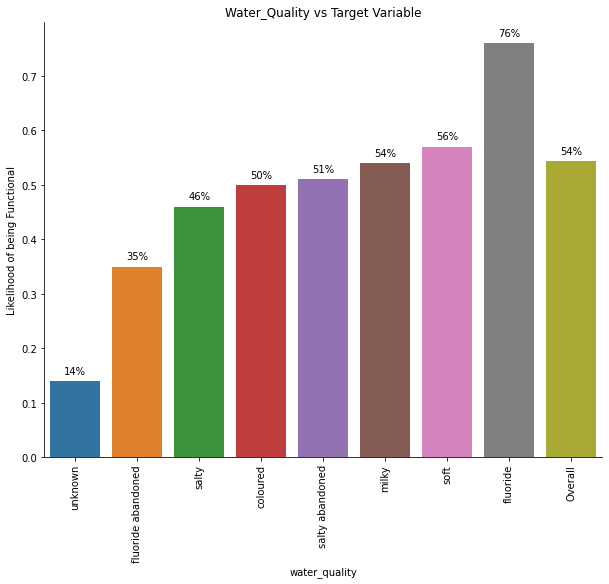

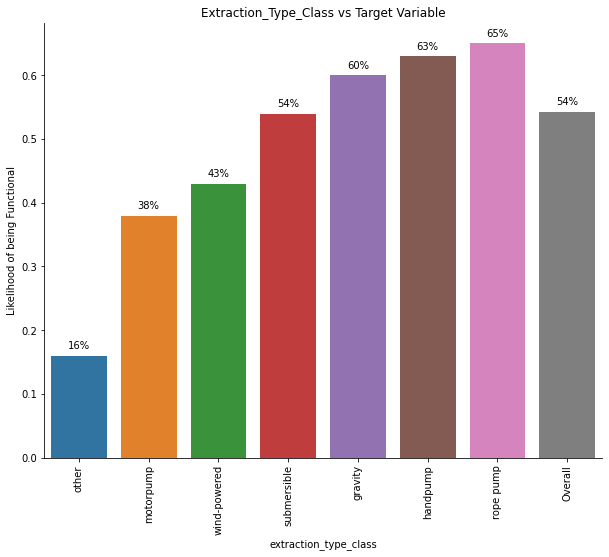

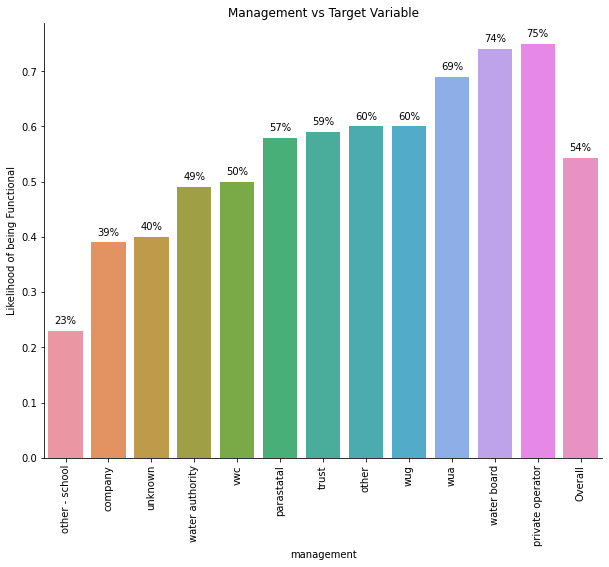

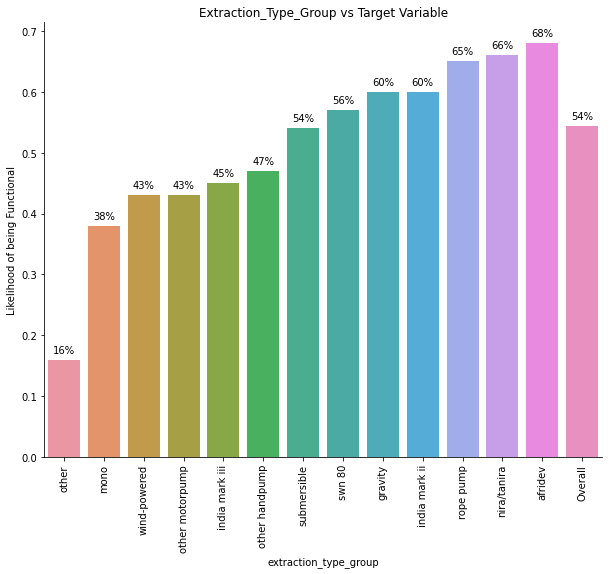

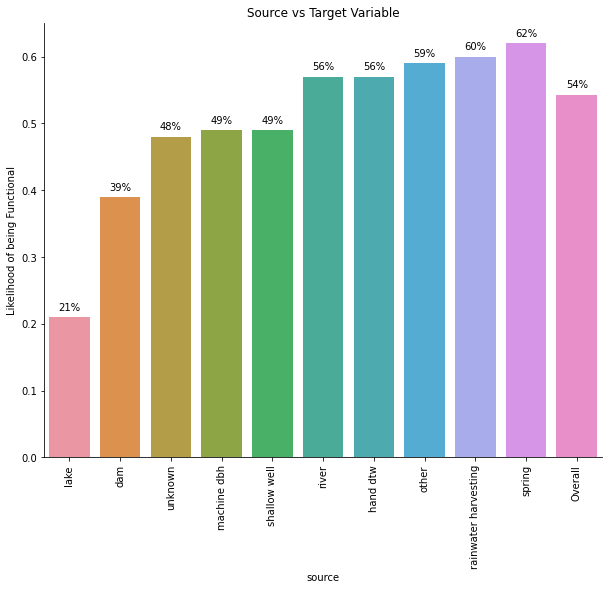

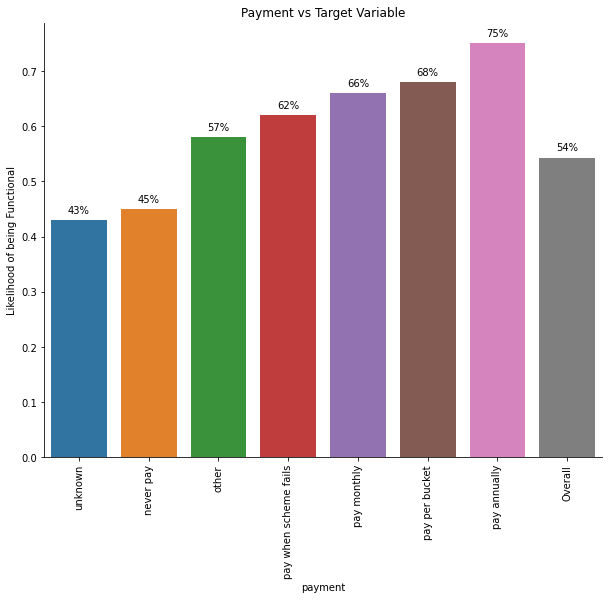

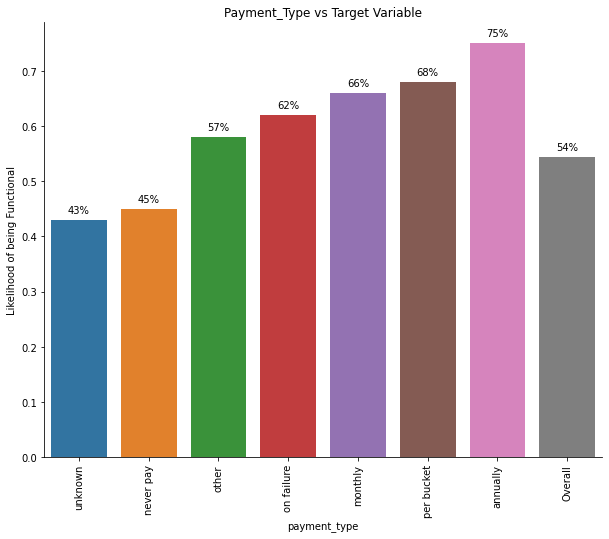

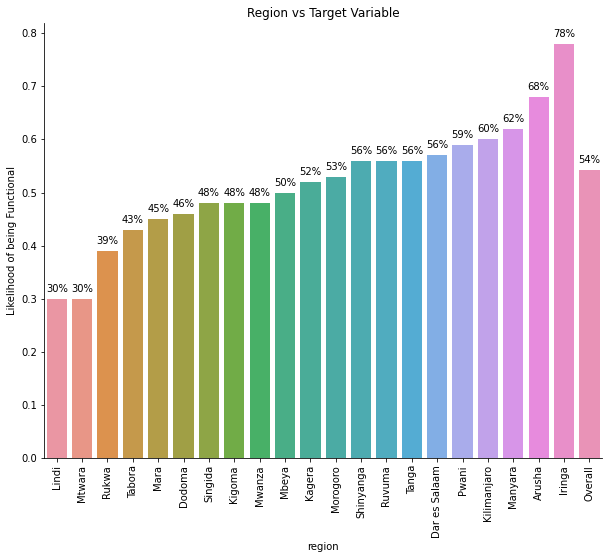

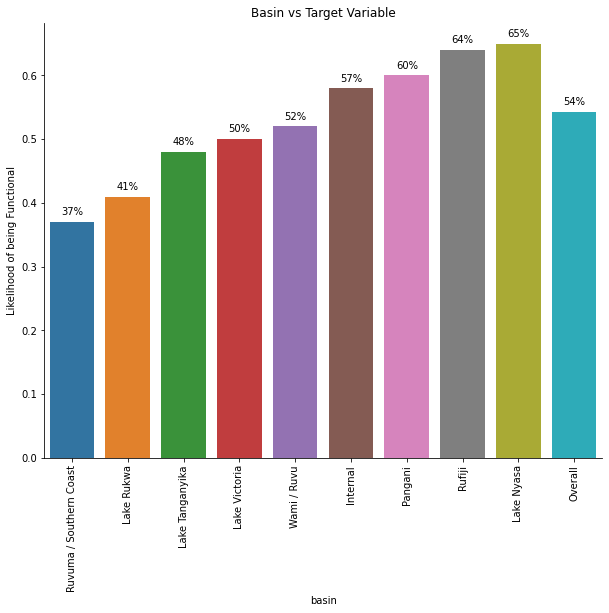

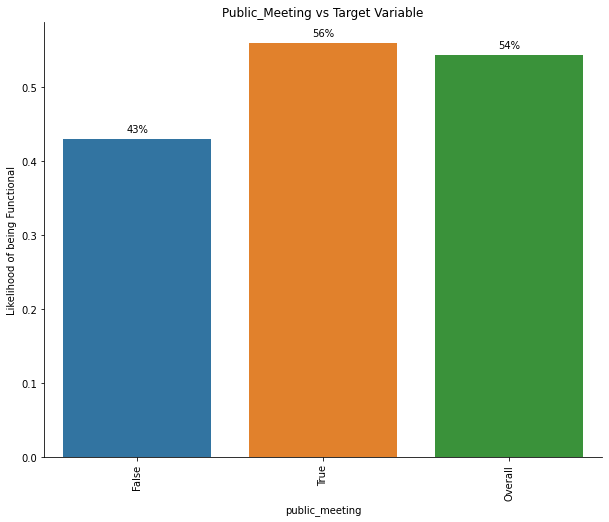

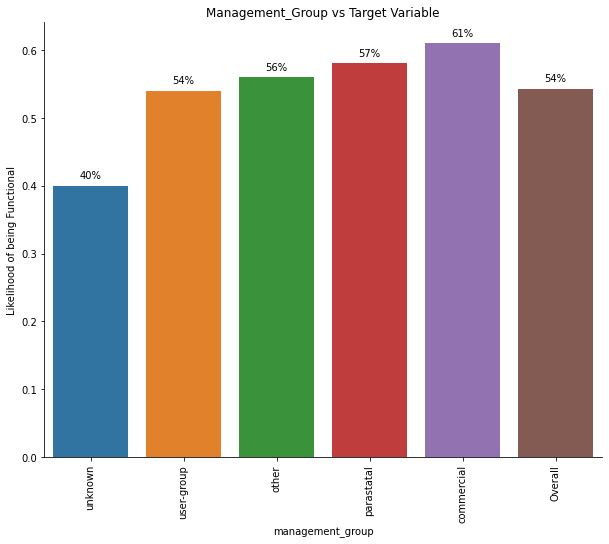

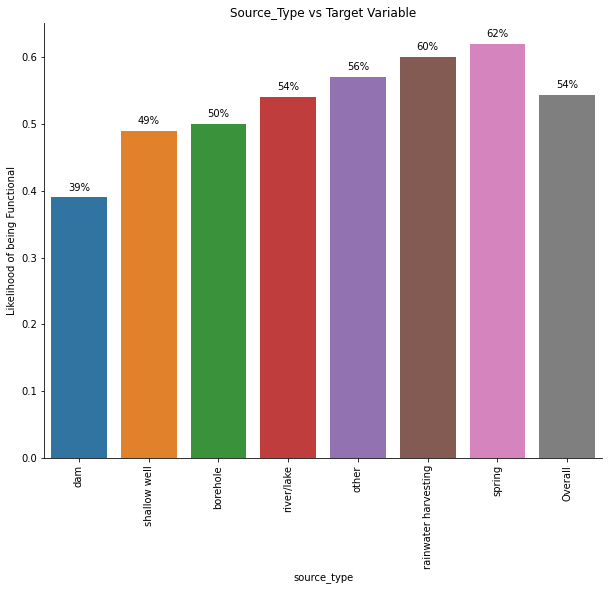

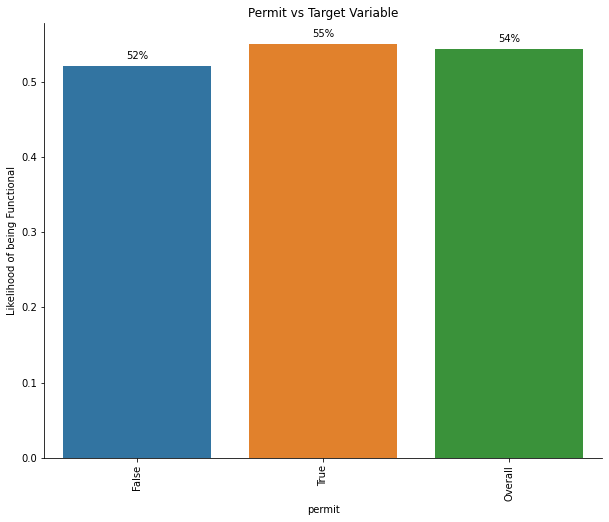

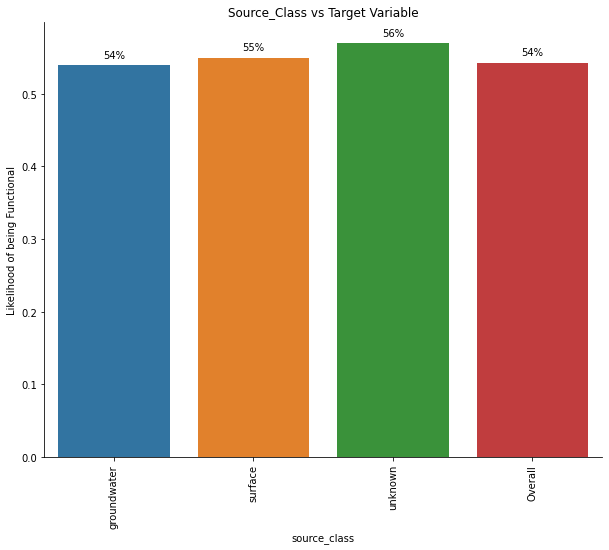

In [30]:
for column in columns:
    feature_vs_target_barchart(column)

**Comment**: <br>
Except feature: 'source_class', and feature 'permit', all other features seem to have a correlation with the target_variable

<a href = '#toc'> Back to Table of Contents </a>

---

---

<h2> Additional EDA </h2>

**Supplemental Question:**<br>
Do region_code and region have one to one relationship?

In [32]:
print(df['region'].nunique(), df['region_code'].nunique())

21 27


In [33]:
s = df.groupby('region')['region_code'].unique()
s

region
Arusha                [2, 24]
Dar es Salaam             [7]
Dodoma                    [1]
Iringa                   [11]
Kagera                   [18]
Kigoma                   [16]
Kilimanjaro               [3]
Lindi             [80, 18, 8]
Manyara                  [21]
Mara                     [20]
Mbeya                    [12]
Morogoro                  [5]
Mtwara            [90, 99, 9]
Mwanza               [19, 17]
Pwani             [60, 6, 40]
Rukwa                    [15]
Ruvuma                   [10]
Shinyanga        [17, 14, 11]
Singida                  [13]
Tabora                   [14]
Tanga                  [4, 5]
Name: region_code, dtype: object

**Comments:**<br>
No

In [ ]:
# what conclusion can we reach here?
# Shoudln't each region have exacty 1 region_code?
# Why should this matter?
# -> Can we not just use feature: region and discard feature: region_code altogether?

<a href = '#toc'> Back to Table of Contents </a>

---

## EDA: Numeric Variables

In [37]:
df_num = df.select_dtypes(include=['float64','int64'])
df_num.head(2)

,amount_tsh,gps_height,longitude,latitude,population,construction_year,target_var
0,6000.0,1390,34.938093,-9.856322,109,1999,1
1,0.0,1399,34.698766,-2.147466,280,2010,1


**Skewness**

The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right.


In [49]:
df_num.skew(axis=None, skipna=None, level=None)

amount_tsh           57.807800
gps_height            0.462402
longitude            -4.191046
latitude             -0.152037
population           12.660714
construction_year    -0.634928
target_var           -0.172971
dtype: float64

<h3> Feature: Population </h3>

**Question:**<br>
Does the distribution of the variable tell us something?

In [38]:
df['population'].describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

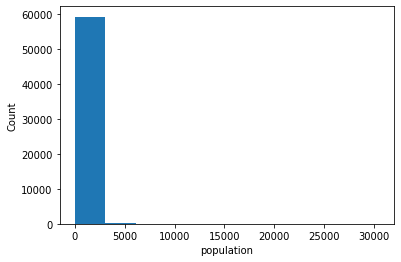

In [42]:
_ = plt.hist(df_num['population'])
_ = plt.xlabel('population')
_ = plt.ylabel('Count')
plt.show()

In [43]:
round(df['population'].value_counts(normalize = True).sort_index(),2)

0        0.36
1        0.12
2        0.00
3        0.00
4        0.00
         ... 
9865     0.00
10000    0.00
11463    0.00
15300    0.00
30500    0.00
Name: population, Length: 1049, dtype: float64

In [52]:
# Skewness
df['population'].skew(axis = None, skipna = None, level = None)

12.660713588843592

**Comments**: <br>
As expected, the data is highly skewed to the right, with <br>
~48% of the data = 0 or 1

**Question**:<br>
For water pumps with population data = 0 or 1, how do they perform?

In [48]:
bool_mask = df['population'].isin([0,1])
df[bool_mask]['target_var'].mean()

0.499366331056819

In [46]:
df['target_var'].mean()

0.543080808080808

**Comments:**<br>
For water pumps with population data = 0 or 1, perform **slightly worse** than the rest.

Issue: How do deal with highly skewed data?


To apply **qcut** we can't have a value occuring so often

drop 48% of the data with population == 0 or 1

In [ ]:
df_inhabitated = df[~df['population'].isin([0,1])].copy()

Let us check again if any of the values occur very frequently

In [ ]:
df_inhabitated['population'].value_counts(normalize = True).sort_values(ascending = False)

We can see that the value that appears the most is 200 which is ~6.3% of the time.\
We should be able to move forward with this now.

Let us now bin the population column into the maximum amount of binning possible.\
Since 100/15 is 6.67 which is still higher than ~6.3%, we can select 15 to be the number of bins.

In [ ]:
df_inhabitated['population_binned'] = pd.qcut(df_inhabitated['population'],
                                                q = 15) # 19 is the max without error

In [ ]:
len(df_inhabitated)/15

In [ ]:
(df_inhabitated['population'] == 35).sum()

In [ ]:
df_inhabitated['population_binned'].value_counts().sort_index()

In [ ]:
2304-245

In [ ]:
_ = df_inhabitated.groupby('population_binned')['target_var'].mean()
_.sort_values()

In [ ]:
_.plot();

*population_binned* and the *likelihood of a pump being functional* has a **quadratic** relationship, with a concave up lineplot

---

Another approach to bin population **cut**

In [ ]:
df['population'].min()

In [ ]:
pd.cut(df['population'],
       bins = 10,).unique()

In [ ]:
pd.cut(df['population'],
       bins = 10,).value_counts(normalize = True)

99% of the data lie in one class

In [ ]:
pd.cut(df[df['population']<3050]['population'],
       bins = 10,).value_counts(normalize = True)

~ 84% of the data lie in one class\
~ 94% of the data in two classes

Should I consider log transformation here? and perhaps potentially bin afterwards, if necessary?

In [ ]:
pd.cut(df[df[['population']<606]['population'],
       bins = 10).value_counts(normalize = True)

This is because 0 constitutes of most of the values

If we were to treat 0s as missing values and impute it?

In [ ]:
pd.cut(df[(df['population']<606) & \
          (df['population']>0)]\
       ['population'],\
       bins = 10).value_counts(normalize = True)

even when we exclude observations with population = 0, a significant amount of observations (~ 36%) still fall under one category

Decision:
1) Treat 0s as missing value\
2) Log transforation\
3) Binning: depending on the situation

---

column: **latitude**, and \
column: **longtitude**

Most northern i.e. the highest latitude is 00 59'S ^\
Most southern i.e. the lowest latitude is 11 45'S v\
\
Most eastern 40 29'E <\
Mose western  29 10'E  >\
\
source: https://worldpopulationreview.com/country-locations/where-is-tanzania

In [ ]:
print(df['latitude'].min(), df['latitude'].max())

In [ ]:
print(df['longitude'].min(), df['longitude'].max())

The westernmost point for Tanzania is 20 10'E\
Hence, all values for longitude lower than 20.10 is invalid data

In [ ]:
df[df['longitude']< 20.10]['longitude'].value_counts()/len(df)

Quite unsurprisingly, the only value less than 20.10 for longitude is 0.\
We can hence make a reasonable assumption that the values of 0.0 for column: **longitude** represent missing values.

In [ ]:
df[df['longitude']== 0.0]['latitude'].value_counts()

In [ ]:
df[df['longitude']== 0.0]['population'].value_counts()

In [ ]:
df[df['longitude']== 0.0]['population'].value_counts()

In [ ]:
df[df['longitude']== 0.0]['target_var'].value_counts()

geography

In [ ]:
df[df['longitude']== 0.0]['region'].value_counts()

In [ ]:
df[df['longitude']== 0.0]['basin'].value_counts()

In [ ]:
df[df['longitude']== 0.0]['district_code'].value_counts()

In [ ]:
district_code = '4'

m   = df[(df['district_code'] == district_code) &
       (df['longitude'] != 0)]\
        ['longitude'].mean()
std = df[(df['district_code'] == district_code) &
         (df['longitude'] != 0)]\
        ['longitude'].std()

print(m, std)

We can assign the missing longitude to be the mean of district_code it belongs to

<a href = '#toc'> Back to Table of Contents </a>